In [8]:
import pandas as pd

Загрузка датасета

In [9]:
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

Просмотр первых строк для проверки

In [10]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Анализируем структуры данных, смотрим какие типы данных у нас в таблице

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Проверяем пропуски 

In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

И на смотрим основную статистику по датасету

In [13]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Обрабатываем далее пропуски 
В данном случае я заполнил пропуски медианной (среднее) значение
В трех колонках имеются пропуски (Age, Cabin, Embarked)

In [14]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())


In [10]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])


In [11]:
titanic_data = titanic_data.drop(columns=['Cabin'])

После заполнение проверяем что все данные встали по местам

In [12]:
titanic_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


После подготовки данных начнем визуализировать графики 
Планирую сделать 5 графиков 
1 - Распределение возрастов пассажиров
2 - Распределение выживших и погибших
3 - Влияние портов посадки
4 - Стоимость билетов
5 - Выживаемость по возрасту

После формирование графиков можно уже выдвигать гипотезы 
Начнем с первого графика 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


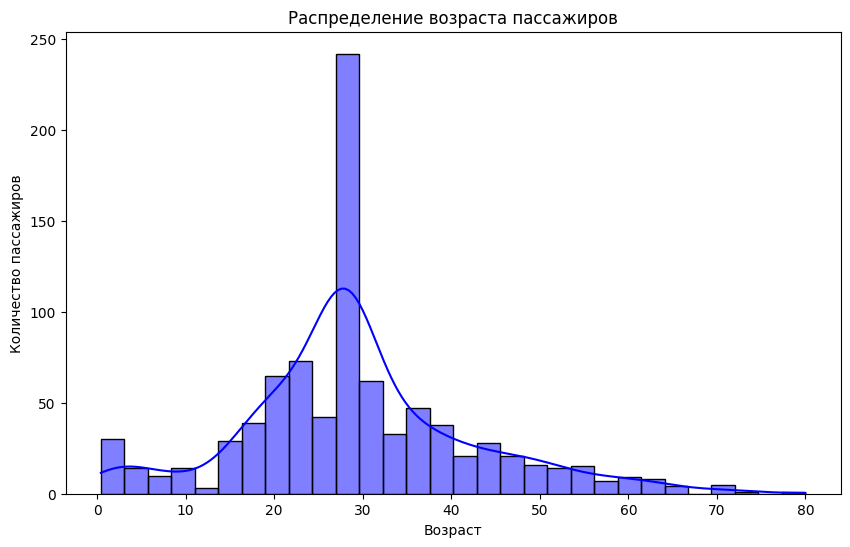

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'], kde=True, bins=30, color='blue')
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

Рассмотрим по подробнее, обновим график, разабьем возраст по группам чтоб по подробнее понять возраст посажиров

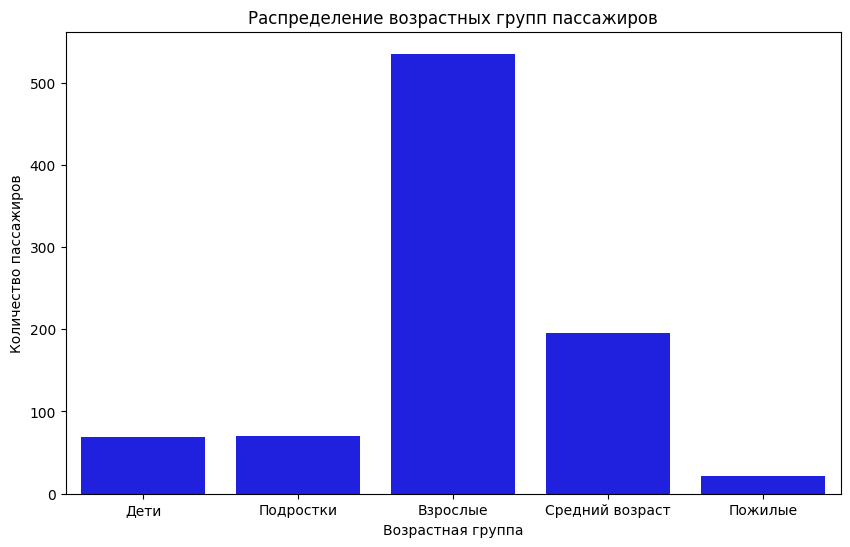

In [18]:
bins = [0, 12, 18, 35, 60, 80]  # Границы возрастов
labels = ['Дети', 'Подростки', 'Взрослые', 'Средний возраст', 'Пожилые']
titanic_data['Возрастная группа'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels)

# Смотрим распределение возрастных групп
age_group_counts = titanic_data['Возрастная группа'].value_counts()

# Визуализация
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_data, x='Возрастная группа', color='blue', order=labels)
plt.title('Распределение возрастных групп пассажиров')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пассажиров')
plt.show()

На графике показано распределение пассажиров по возрастным группам:
Дети (0–12 лет).
Подростки (13–18 лет).
Взрослые (19–35 лет).
Люди среднего возраста (36–60 лет).
Пожилые (61–80 лет).

Что мы видим: 
1 - Больше всего пассажиров в категории “Взрослые” (19–35 лет).
2 - Категории “Подростки” и “Пожилые” представлены меньшим количеством пассажиров.
3 - “Дети” составляют небольшую долю, но все же заметны на графике


Исходя из этого можем выдвинуть следующую гипотезу
Пассажиры из разных возрастных групп имеют разную вероятность выживания.
Например, дети могли выживать чаще благодаря приоритету спасения.

Для проверки мы построим таблицу выживаемости по возрастным группам и проведем хи-квадрат тест независимости.

In [20]:
from scipy.stats import chi2_contingency
survival_by_age_group = pd.crosstab(titanic_data['Survived'], titanic_data['Возрастная группа'])

# Хи-квадрат тест
chi2, p, dof, expected = chi2_contingency(survival_by_age_group)

print("Хи-квадрат:", chi2)
print("p-значение:", p)

if p < 0.05:
    print("Гипотеза отвергнута: возрастная группа влияет на выживаемость.")
else:
    print("Гипотеза не отвергнута: возрастная группа не влияет на выживаемость.")

Хи-квадрат: 16.394516270659466
p-значение: 0.0025329953988095623
Гипотеза отвергнута: возрастная группа влияет на выживаемость.


Гипотеза о независимости отвергнута: возрастная группа влияет на вероятность выживания.
Это означает, что распределение выживаемости среди возрастных групп не одинаково.

Посмотрим детальнее какие возрастные группы наиболее сильно влияют на результат
Посмотрим график выживаемости по возрастным группам

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_data, x='Возрастная группа', hue='Survived', palette='coolwarm', order=labels)
plt.title('Выживаемость по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пассажиров')
plt.legend(['Не выжил', 'Выжил'])
plt.show()

Что мы видим 
	1.	Дети (0–12 лет):
        Достаточно высокая доля выживших, что соответствует историческим данным (детям отдавали приоритет при спасении).
	2.	Подростки (13–18 лет):
	    Выживаемость примерно сбалансирована, хотя доля выживших чуть меньше.
	3.	Взрослые (19–35 лет):
	    Самая большая возрастная группа.
	    Заметно больше погибших, чем выживших.
	4.	Средний возраст (36–60 лет):
	    Количество выживших меньше, чем погибших, но не так критично, как у взрослых.
	5.	Пожилые (61–80 лет):
	    Очень мало выживших, что говорит о низком приоритете для пожилых пассажиров

По итогу можем сказать что подтверждаем статистически и визуально, что возрастные группы влияют на вероятность выживания. 
Дети, как и ожидалось, выживали чаще


Теперь посмотрим сколько пассажиров выжило, а сколько погибло. Это позволит нам оценить общую картину катастрофы.

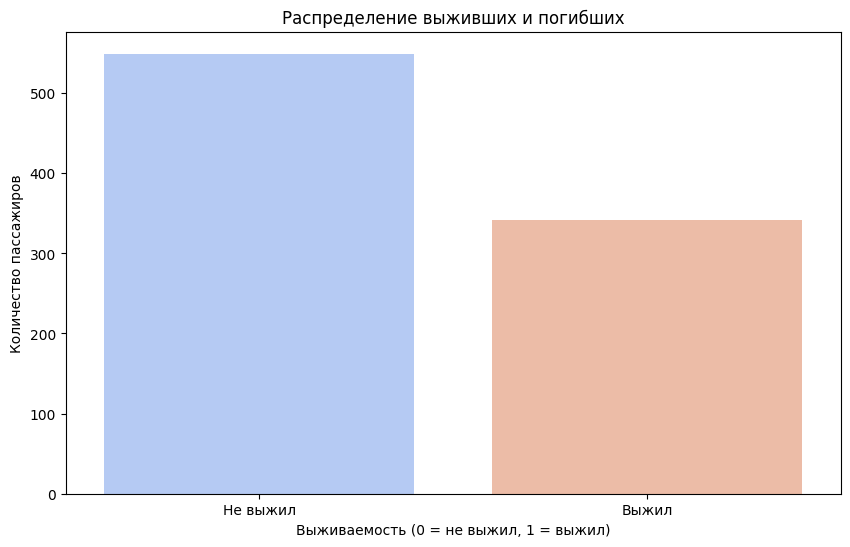

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_data, x='Survived', hue='Survived', dodge=False, palette='coolwarm')
plt.title('Распределение выживших и погибших')
plt.xlabel('Выживаемость (0 = не выжил, 1 = выжил)')
plt.ylabel('Количество пассажиров')
plt.legend([], [], frameon=False)  # Убираем лишнюю легенду
plt.xticks(ticks=[0, 1], labels=['Не выжил', 'Выжил'])
plt.show()

На графике видно общее распределение выживших и погибших пассажиров:
1.	Не выжил (0):
	Значительно больше пассажиров погибло.
	Количество погибших превышает 500 человек.
2. Выжил (1):
	Около 300 пассажиров смогли выжить.

Теперь построим график, чтобы посмотреть, как распределяются пассажиры по портам посадки. Это поможет нам понять, из какого порта село больше людей, а также выдвинуть гипотезу о связи порта посадки с выживаемостью.

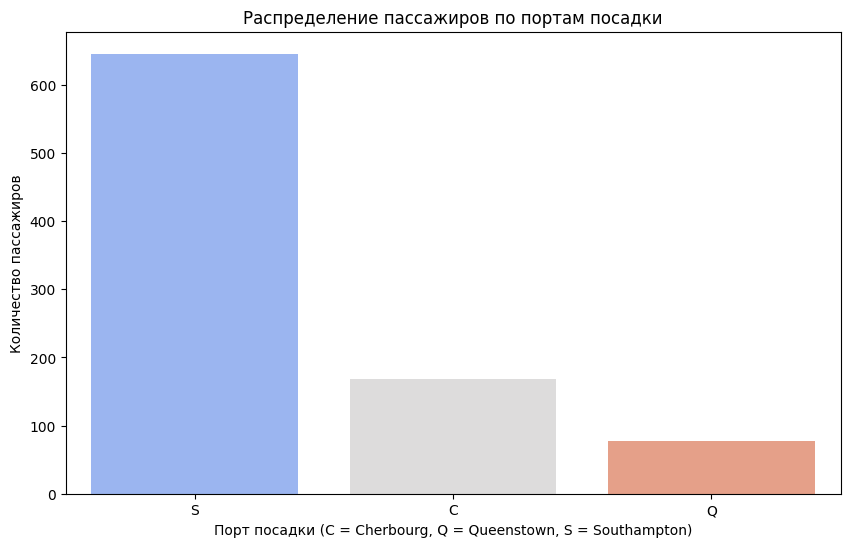

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_data, x='Embarked', hue='Embarked', dodge=False, palette='coolwarm')
plt.title('Распределение пассажиров по портам посадки')
plt.xlabel('Порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Количество пассажиров')
plt.legend([], [], frameon=False) 
plt.show()

На графике видно распределение пассажиров по портам посадки:
	1.	Southampton (S):
	    Наибольшее количество пассажиров село в Саутгемптоне — более 600 человек.
	2.	Cherbourg (C):
	    Около 200 пассажиров село в Шербуре.
	3.	Queenstown (Q):
	    Меньше всего пассажиров (около 100) село в Квинстауне.

Порт Southampton (S) был основным местом посадки для большинства пассажиров. Так как Саутгемптон был первым пунктом отправления Титаника.

Построим график, который покажет выживаемость пассажиров по портам посадки.

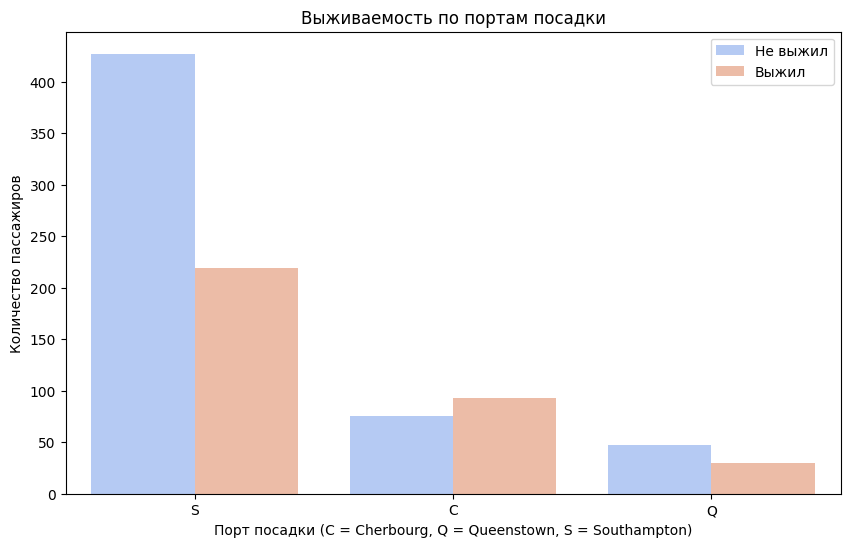

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_data, x='Embarked', hue='Survived', palette='coolwarm')
plt.title('Выживаемость по портам посадки')
plt.xlabel('Порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Количество пассажиров')
plt.legend(['Не выжил', 'Выжил'])
plt.show()

На графике видим выживаемость пассажиров в зависимости от порта посадки:
	1.	Southampton (S):
	    Большинство пассажиров не выжило.
	    Однако значительная часть пассажиров выжила, учитывая общее количество посадившихся.
	2.	Cherbourg (C):
	    На удивление, большинство пассажиров из Шербура выжило. Это может быть связано с их принадлежностью к первому классу.
	3.	Queenstown (Q):
	    В Квинстауне количество выживших значительно меньше, чем погибших, но общее число пассажиров из этого порта невелико.

In [28]:
from scipy.stats import chi2_contingency

# Таблица сопряженности (порт посадки и выживаемость)
survival_by_port = pd.crosstab(titanic_data['Embarked'], titanic_data['Survived'])

# Хи-квадрат тест
chi2, p, dof, expected = chi2_contingency(survival_by_port)

print("Хи-квадрат:", chi2)
print("p-значение:", p)

if p < 0.05:
    print("Гипотеза отвергнута: порт посадки влияет на выживаемость.")
else:
    print("Гипотеза не отвергнута: порт посадки не влияет на выживаемость.")

Хи-квадрат: 25.964452881874784
p-значение: 2.3008626481449577e-06
Гипотеза отвергнута: порт посадки влияет на выживаемость.


Гипотеза о независимости отвергнута.
Означает, что порт посадки влияет на вероятность выживания.
Например, пассажиры из Шербура (Cherbourg) выживали чаще, чем пассажиры из Саутгемптона (Southampton).

Перейдем к следующему графику: распределение стоимости билетов.
Изучение стоимости билетов поможет понять, как она распределена среди пассажиров. 
Это может быть связано с классом кают и, возможно, с выживаемостью.

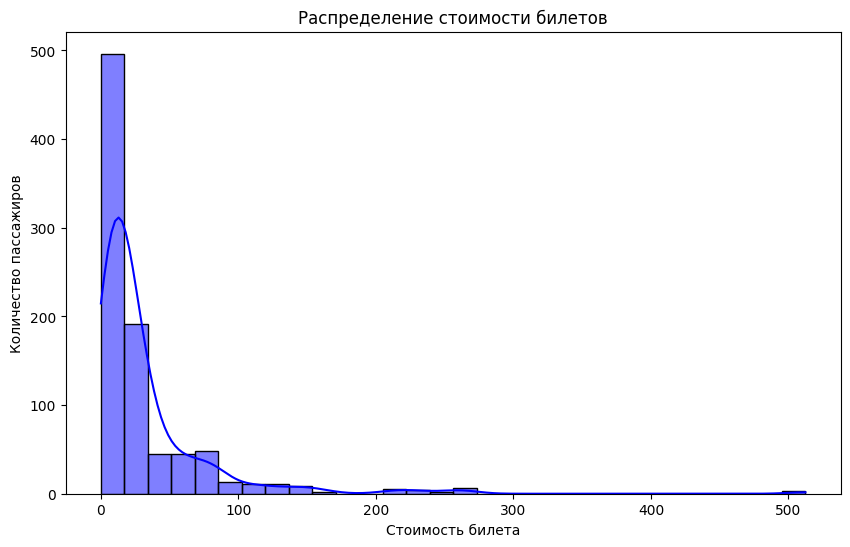

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Fare'], kde=True, bins=30, color='blue')
plt.title('Распределение стоимости билетов')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.show()

На графике видим распределение стоимости билетов пассажиров:
	1.	Большинство билетов стоило дешево (менее 50):
	    Это связано с большим количеством пассажиров 3-го класса.
	    Пик около 10-15 единиц.
	2.	Дорогие билеты (свыше 100):
	    Значительно меньше пассажиров приобрели билеты высокой стоимости.
	    Это, скорее всего, билеты 1-го класса.
	3.	Выбросы:
	    Есть редкие случаи, где стоимость превышает 500, что соответствует VIP-каютам.

Можем выдвинуть следующую гипотезу
“Пассажиры с более дорогими билетами имели большую вероятность выживания.”

Проверим так же гипотезу

In [30]:
from scipy.stats import ttest_ind

# Разделяем стоимость билетов на две группы
fare_survived = titanic_data[titanic_data['Survived'] == 1]['Fare']
fare_not_survived = titanic_data[titanic_data['Survived'] == 0]['Fare']

# Выполняем t-тест
t_stat, p = ttest_ind(fare_survived, fare_not_survived, equal_var=False)

print("t-статистика:", t_stat)
print("p-значение:", p)
if p < 0.05:
    print("Гипотеза подтверждена: стоимость билета влияет на вероятность выживания.")
else:
    print("Гипотеза не подтверждена: стоимость билета не влияет на вероятность выживания.")

t-статистика: 6.839099259085254
p-значение: 2.6993323503141236e-11
Гипотеза подтверждена: стоимость билета влияет на вероятность выживания.


Исходя из вывода можем сказать что пассажиры с более дорогими билетами (скорее всего, 1-й класс) имели значительно большую вероятность выжить, чем пассажиры с дешевыми билетами (3-й класс).

Хочу понять, как возраст связан с выживаемостью. Возможно, дети имели приоритет при спасении, а пожилые пассажиры выживали реже.
Построим график ящик с усами

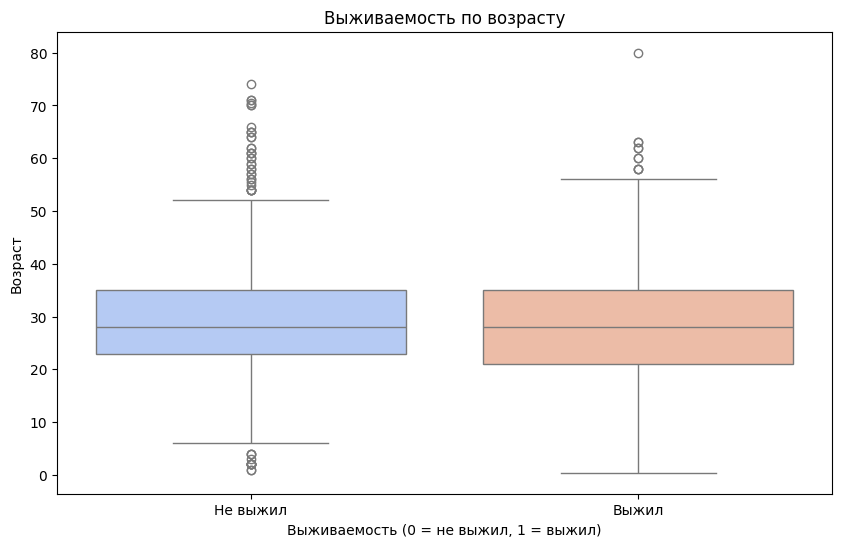

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_data, x='Survived', y='Age', hue='Survived', dodge=False, palette='coolwarm')
plt.title('Выживаемость по возрасту')
plt.xlabel('Выживаемость (0 = не выжил, 1 = выжил)')
plt.ylabel('Возраст')
plt.legend([], [], frameon=False)  # Убираем лишнюю легенду
plt.xticks(ticks=[0, 1], labels=['Не выжил', 'Выжил'])
plt.show()

Что видим
1.	Выжившие (1):
	Медианный возраст выживших выше (около 30 лет).
	Диапазон возрастов шире, но дети и молодые пассажиры составляют значительную часть.
2. Не выжившие (0):
	Медианный возраст немного ниже (около 28 лет).
	Широкий диапазон возрастов, но в основном взрослые пассажиры.
3. Выбросы:
	У обеих групп есть выбросы (например, пожилые пассажиры старше 70 лет), но они незначительно влияют на общий тренд.

Гипотеза Возраст пассажиров влияет на вероятность выживания.
Например, молодые пассажиры (дети и подростки) могли выживать чаще благодаря приоритетам при спасении.

In [33]:
from scipy.stats import ttest_ind

# Разделяем возраст на две группы
age_survived = titanic_data[titanic_data['Survived'] == 1]['Age']
age_not_survived = titanic_data[titanic_data['Survived'] == 0]['Age']

t_stat, p = ttest_ind(age_survived, age_not_survived, equal_var=False)

print("t-статистика:", t_stat)
print("p-значение:", p)
if p < 0.05:
    print("Гипотеза подтверждена: возраст влияет на вероятность выживания.")
else:
    print("Гипотеза не подтверждена: возраст не влияет на вероятность выживания.")

t-статистика: -1.8966053920256696
p-значение: 0.058309159977757444
Гипотеза не подтверждена: возраст не влияет на вероятность выживания.


Гипотеза о том, что возраст влияет на вероятность выживания, не подтверждена.
Это может означать, что возраст пассажиров не был решающим фактором для их выживаемости.

Мы проверяем, есть ли корреляция между возрастом, стоимостью билетов и выживаемостью пассажиров.
Используем коэффициент корреляции Спирмена для количественных переменных, так как распределения могут быть не нормальными.

In [37]:
from scipy.stats import spearmanr

correlation_age_fare, p_value_age_fare = spearmanr(titanic_data['Age'], titanic_data['Fare'])
print(f"Корреляция между возрастом и стоимостью билета: {correlation_age_fare:.2f}, p-значение: {p_value_age_fare:.3f}")

# Корреляция между возрастом и выживаемостью
correlation_age_survived, p_value_age_survived = spearmanr(titanic_data['Age'], titanic_data['Survived'])
print(f"Корреляция между возрастом и выживаемостью: {correlation_age_survived:.2f}, p-значение: {p_value_age_survived:.3f}")

# Корреляция между стоимостью билета и выживаемостью
correlation_fare_survived, p_value_fare_survived = spearmanr(titanic_data['Fare'], titanic_data['Survived'])
print(f"Корреляция между стоимостью билета и выживаемостью: {correlation_fare_survived:.2f}, p-значение: {p_value_fare_survived:.3f}")

Корреляция между возрастом и стоимостью билета: 0.13, p-значение: 0.000
Корреляция между возрастом и выживаемостью: -0.04, p-значение: 0.270
Корреляция между стоимостью билета и выживаемостью: 0.32, p-значение: 0.000


Что можем сказать
	Возраст оказывает минимальное влияние на выживаемость.
	Стоимость билета является значимым фактором, влияющим на выживаемость.
	Слабая связь между возрастом и стоимостью билета подтверждает, что возраст сам по себе не является определяющим для класса каюты.

Так как возраст может не иметь нормального распределения, используем тест Манна-Уитни для проверки различий между выжившими и не выжившими.

In [38]:
from scipy.stats import mannwhitneyu

u_stat, p_value_u = mannwhitneyu(age_survived, age_not_survived, alternative='two-sided')

print(f"U-статистика: {u_stat}, p-значение: {p_value_u}")
if p_value_u < 0.05:
    print("Гипотеза подтверждена: возраст влияет на вероятность выживания (на основании теста Манна-Уитни).")
else:
    print("Гипотеза не подтверждена: возраст не влияет на вероятность выживания (на основании теста Манна-Уитни).")

U-статистика: 89779.5, p-значение: 0.2696731214886363
Гипотеза не подтверждена: возраст не влияет на вероятность выживания (на основании теста Манна-Уитни).


Результаты теста Манна-Уитни подтверждают результаты t-теста.
Возраст пассажиров не является значимым фактором, влияющим на вероятность выживания.
Это согласуется с предыдущим анализом корреляции, где связь между возрастом и выживаемостью также была минимальной.